<a href="https://colab.research.google.com/github/G-Madhuri/iiith_AI-ML_course/blob/main/Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Done by- Gottumukala Madhuri**
Topic: Statistics and Probability

In [3]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

**What is Probability?**
In nature as in Compute Science, one of several events can be predicted to occur, but we do not know exactly which of them will occur. The supposition is that they will occur with different frequencies, and we know those frequency. So each time we run the experiment, we call is a sample.<br>
$$P = \frac{\text{number of favorable samples}}{\text{number of samples}}$$

**Probability**

In [4]:
def toss_coin(no_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], no_of_tosses))
def throw_dice(no_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, no_of_tosses))

results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(width=0.3,x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

Heads    57
Tails    43
Name: count, dtype: int64


**Derived Probability Distributions**

Given the simple fact that each toss will be heads or tails (also called a bernoulli distribution) we can come up with a derived question, that given 20 coin tosses, what is the probability that 7 of them are heads.

You can see the probability distribution below, it's called a Binomial distribution and looks like a Bell. This will always happen whenever you have a bunch of independently sampled variables. (Independent and Identical, see Central Limit Theorem)

In [5]:
# toss it 20 times
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [6]:
# toss it 500 times
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

**Regression to the Mean**
<br>We have the 1/6 theoretical result as a Red line. The probability of getting each number from 1 to 6 is shown, but the different colors represent the different number of experiments it was sampled from. Blue was estimated using 10 experiments, Red using 100, Green with a 1000, Purple with 10000, and Orange with 100000. You can see that as we get more samples, the correctness and the reliability of that correctness increases.

You can also see, that if we took 100 samples, and we have a value far away from 1/6, taking more samples will take us back to 1/6 in time. This phenomenon is called Regression to the Mean and you can hear more about it in the following Veritasium videos.

In [7]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

**Questions to be solved**


**1.**If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.<br>
**Solution:** Probability= (Number of numbered cards) / (Total number of cards) = 36/52 = 9/13 <br>

**2.**In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.<br>
**Solution:**We need to multiply the probabilities because they are independent events
<br> P(both cards numbered)= P(first card numbered)*P(second card numbered)
<br> P(both cards numbered)= (36/52)*(36/52)= 81/169

**3.**Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.
<br>**Solution:** These are dependant events now
<br>P(both cards are numbered)=P(first card is numbered)*P(second card is numbered | first card is numbered)
<br>P(both cards are numbered)= (36/52)*(35/51) = 105/221

**4.**Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.
<br>**Solution:**
<br>Spades: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, King (13 cards)<br>
Hearts: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, King (13 cards)<br>
Diamonds: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, King (13 cards)<br>
Clubs: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, King (13 cards)<br>
When divided into half the bottom cut will be left with diamonds and clubs which have 18 numbered cards of total 26 cards
<br>P(card from bottom cut is numbered)=18/26=9/13

**Fundamentals of Probability**

Rules of probability:<br>
1. $0 \leq p(A)\leq 1$
2.  $\Sigma^n_{i=0} p(A_i)=1$
3. $p(A^C)+p(A) = 1$
4. (Addition Rule) $p(A \cup B)= p(A) + p(B) - p(AB)$
5. (Multiplicative Rule)  $p(AB) = p(A)p(B)$

<div class="alert alert-info">
📝 <b>Note:</b> Events A and B are independent if the occurence of event A doesn't change the likelihood of Event B occuring. Do not confuse this with <b>mutually exclusive</b> events. If events A and B are mutually exclusive (disjoint), they cannot both happen.
</div>

**Expectation**
<br>
<br>$$E = \sum_{i \in S} P_i V_i$$

Where S is the sample space, $P_i$ is the probability of the sample, and $V_i$ is the value associated with the sample. $i$ is each possible sample in the sample space.

**Simulating to compute Expectation**
<br>**Question:**  You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?
<br>**Solution:**The formula E ( position of first ace ) = (n + 1) / ( k + 1) is derived from the concept of dividing the deck into segments and using the uniform distribution of the positions
<br>E(position of first ace)= (52+1)/(4+1)=53/5=10.6
<br>E(non-aces)=E(position of first ace)-1 = 10.6-1= 9.6

In [10]:
# solution using code
import random

def simulate_draws(num_trials):
    non_ace_counts = []

    for _ in range(num_trials):
        deck = ['Ace'] * 4 + ['Non-Ace'] * 48
        random.shuffle(deck)  # Shuffle the deck

        non_ace_count = 0
        for card in deck:
            if card == 'Ace':
                break
            non_ace_count += 1

        non_ace_counts.append(non_ace_count)

    # average number of non-aces drawn before the first ace
    expected_non_aces = sum(non_ace_counts) / num_trials
    return expected_non_aces


num_trials = 100000
expected_value = simulate_draws(num_trials)
print(f"Expected number of non-ace cards drawn before the first ace: {expected_value:.2f}")


Expected number of non-ace cards drawn before the first ace: 9.55


In [11]:
# given code
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

6 cards were thrown: QD 6S 4H 7H 6D 4D AC
10 cards were thrown: QH 5C JD 3S 7S JH 2D 10H 6C 10S AH
5 cards were thrown: 6S 5C 4D 8C 6C AD
3 cards were thrown: KH 4H 8H AS
3 cards were thrown: 8D 8H 9H AS
1 cards were thrown: QS AC
6 cards were thrown: 3C 4S 3D 5C 6D 4D AD
8 cards were thrown: KH 7C 9H KD 4D 10D 8H 10H AC
6 cards were thrown: KS 8S JC QS KC 3D AD
9 cards were thrown: 5C 2S 10H KC 7D QC 8D 7H 2C AD

9.7001 cards are tossed before we see the first ace!


**Visualizing the Underlying Probability Mass Function**
<br>almost 1/13 cards are aces, so about 12 can be met on average before you see your first ace..percentage of aces increases as you keep throwing away the cards, so the actual expectation is not that.

In [12]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

**Technique of Contributions**
<br>You can say that if there was only 1 non-ace card, and 4 aces in the deck, the number of cards thrown would be  15 , since if and only if the numbered card is the first one you pick do you throw away a card, otherwise it's 0. So the card contributes  15  to the answer, which it does if it's picked before any of the 4 aces.

Now each of the cards are non-interacting, and there are  48  non-ace cards, so our answer would be  485=9.6

**Measurements and Errors**

**Using Mean Squared Error**
**Benefits:** In my view if we are using mean error instead of mean squared error when we consider a case where the positive and negative error gets cancelled out while calculating
<br>Ex: 5+(-5)=0 error using mean error
<br> using mean squared error method it will provide us with correct results
<br> error=sqrt((5)*2+(-5)*2)=sqrt(25+25)=5*sqrt(2)

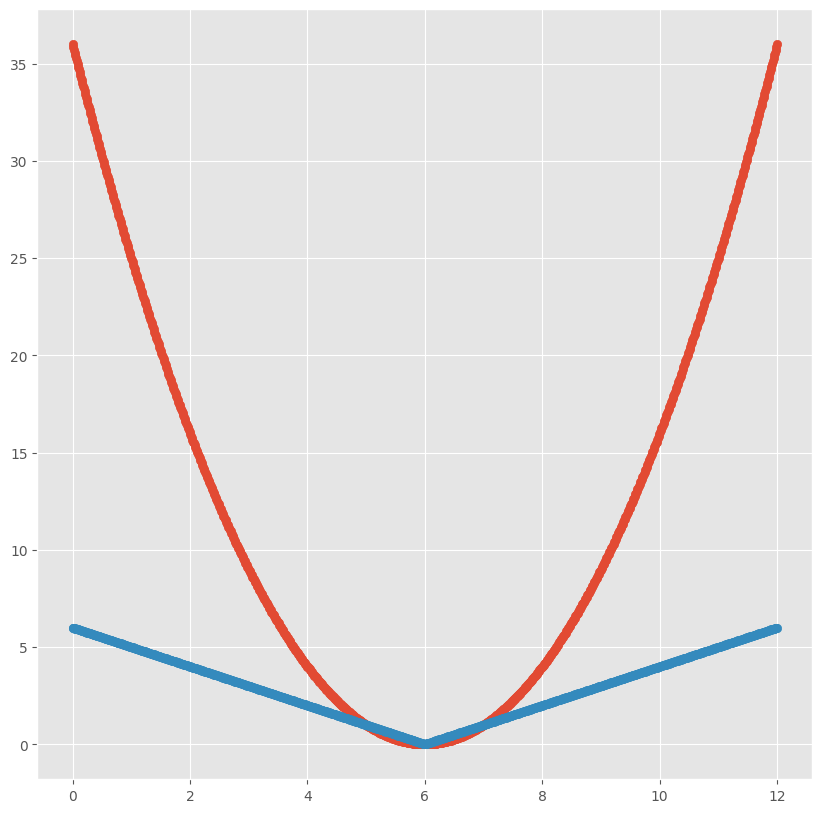

In [13]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

**Standardisation**

In [38]:
import pandas as pd

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack',
             'Kathy', 'Leo', 'Mia', 'Nina', 'Oscar', 'Paul', 'Quinn', 'Rita', 'Sam', 'Tina',
             'Uma', 'Vera', 'Will', 'Xena', 'Yara', 'Zara'],
    'Maths': [85, 92, 76, 89, 95, 72, 88, 91, 78, 84,
              90, 73, 86, 80, 88, 91, 83, 87, 76, 92,
              84, 79, 88, 91, 82, 90],
    'Physics': [78, 88, 75, 92, 90, 80, 84, 79, 85, 88,
                91, 70, 87, 82, 86, 95, 81, 89, 78, 93,
                80, 76, 82, 88, 79, 85],
    'Biology': [90, 85, 80, 88, 94, 78, 90, 85, 82, 87,
                92, 75, 89, 81, 88, 90, 84, 91, 77, 90,
                83, 75, 89, 92, 80, 86]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('data.csv', index=False)


In [39]:
print(df.shape)
df.agg(["mean", "var", "std"])

(26, 4)


TypeError: Could not convert string 'AliceBobCharlieDavidEvaFrankGraceHannahIanJackKathyLeoMiaNinaOscarPaulQuinnRitaSamTinaUmaVeraWillXenaYaraZara' to numeric

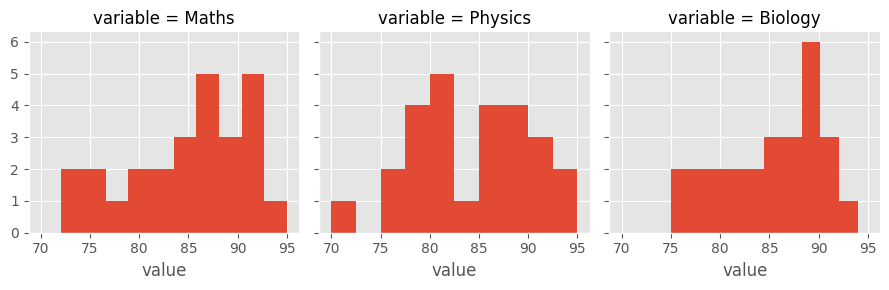

In [43]:
melted_grades = df.melt(id_vars='Name', var_name='variable', value_name='value')

# Create a FacetGrid and map the histogram
g = sns.FacetGrid(melted_grades, col='variable', col_wrap=3)
g.map(plt.hist, 'value', bins=10)

# Show the plots
plt.show()

In [45]:
df["Physics_std"] = (df["Physics"] - df["Physics"].mean()) / df["Physics"].std()

In [46]:
df

,Name,Maths,Physics,Biology,Physics_std
0,Alice,85,78,90,-0.954282
1,Bob,92,88,85,0.667374
2,Charlie,76,75,80,-1.440779
3,David,89,92,88,1.316036
4,Eva,95,90,94,0.991705
5,Frank,72,80,78,-0.629951
6,Grace,88,84,90,0.018711
7,Hannah,91,79,85,-0.792117
8,Ian,78,85,82,0.180877
9,Jack,84,88,87,0.667374


In [48]:
df.head()

,Name,Maths,Physics,Biology,Physics_std
0,Alice,85,78,90,-0.954282
1,Bob,92,88,85,0.667374
2,Charlie,76,75,80,-1.440779
3,David,89,92,88,1.316036
4,Eva,95,90,94,0.991705


In [49]:
df["Maths_std"] = (df["Maths"] - df["Maths"].mean()) / df["Maths"].std()
df.head()

,Name,Maths,Physics,Biology,Physics_std,Maths_std
0,Alice,85,78,90,-0.954282,0.000000
1,Bob,92,88,85,0.667374,1.104590
2,Charlie,76,75,80,-1.440779,-1.420187
3,David,89,92,88,1.316036,0.631194
4,Eva,95,90,94,0.991705,1.577986


**Mathematics of Probability**<br>
**Conditional Probability** a probability under a condition.<br>
A general formula for conditional probability is as follows. The conditional probability of A given B is

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$<br>
if the probability of event A is not changed by the occurence of event B.

We can restate the definition above as

$$P(A|B)=P(A)$$

**Law of Total Probability**
<br>Let $A_1, \dots A_n$ be mutually exclusive and exhaustive events, where $P(A)\neq 0$ for all $A$. Then, the probability of $P(B)$ can be defined as

$$P(B)=\sum^n_{i=1}P(B|A_i)P(A_i)$$

**Bayes' Theorem**
<br>$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

$$Posterior=\frac{Likelihood\times Prior}{Evidence}$$

An informal way of putting Bayes' Theorem:

$$P(pred|data)=\frac{P(data|actual)P(actual)}{P(data)}$$

The proof for Bayes' Theorem follows from the definition of conditional independence. We know that

$$\begin{align}
P(A\cap B)&=P(A|B)\times P(B)\\
&=P(B|A)\times P(A)
\end{align}$$

This can be rearranged to state Bayes's Theorem:

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

**Random variables**
- A **continuous random variable** takes on infinitely many values/real numbers. In fact, the probability of a continuous random variable taking on any one value is 0.
- A **discrete random variable** takes on a finite set of values, e.g. counts.

**Probability Distributions**
A random variable is a variable whose possible values are the outcomes of a non-deterministic process.

**Binomial distribution**<br>
We start with the binomial distribution. The binomial distribution models the probability of  k  successes in  n  independent trials.


**pmf:**probability mass function

In [51]:
from scipy.stats import binom
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

By the **complement rule**, $P(X \leq 3) = 1 - P(X=5)-P(X=4)$.

In [55]:
actual=binom.pmf(k=3, n=5, p=0.75)+binom.pmf(k=2, n=5, p=0.75)+binom.pmf(k=1, n=5, p=0.75)+binom.pmf(k=0, n=5, p=0.75)
complement=binom.pmf(k=4, n=5, p=0.75) + binom.pmf(k=5, n=5, p=0.75)
print("Actual: ",actual)
print("Complement: ",complement)

Actual:  0.3671874999999998
Complement:  0.6328125


Note that we could also answer this by referring to the value of the **cumulative density function** at $X=3$.

The cumulative density function, $F(x)$, is defined as

$$F(x)=P(X\leq x)$$

The CDF returns the probability that a random variable is less than  x . For instance, because of the symmetric shape of the normal distribution, the CDF of the standard normal distribution at 0 is expected to be 0.5.

In [56]:
binom.cdf(3, n=5, p=0.75)

0.3671875

**Normal distribution**

We move on to the **normal distribution**. There are some key properties that are important to know about this distribution:

- The mean, median and mode of the distribution is the same.
- The curve is bell-shaped.
- The total area under the curve is 1.
- Symmetric about the mean.

There are two key **shape parameters** that define the location and spread of the normal distribution: the mean, commonly denoted as $\mu$; and the standard deviation, commonly denoted as $\sigma$.

**Standard normal distribution**

A normally distributed random variable with mean 0 and standard deviation 1 is said to follow the standard normal distribution, also known as the **z-distribution**.

A normally distributed random variable can be converted into the standard normal distribution by standardisation:

$$Z = \frac{X-\mu}{\sigma}$$

<div class="alert alert-info">
    <b>Note:</b> The <code>.pdf</code> method refers to the <b>probability density function</b>, which is the counterpart of the probability mass function for continuous random variables.
</div>

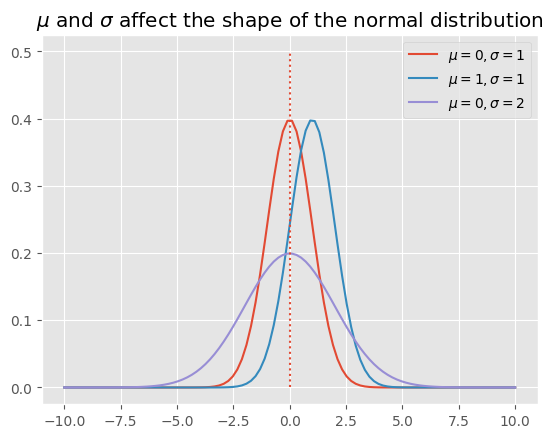

In [57]:
from scipy.stats import norm
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

Programmatic solutions: **percent point function**,available via the ppf() method.


The percent point function does the inverse of the cumulative density function. It returns the percent point given the value of the CDF:

In [58]:
norm.cdf(0)

0.5

In [59]:
norm.ppf(0.5)

0.0

**Standard deviation rule/empirical rule**

This rule states that for a normally distributed random variable,
- 68% of data lies within 1 standard deviation of the mean.
- 95% of data lies within 2 standard deviations of the mean, and
- 99.7% of data lies within 3 standard deviations of the mean.
<br>Example: height

Maalysian males' heights are normally distributed with mean 169.57 and standard deviation 7.57. Answer the following questions programmatically and using the empirical rule.

- 84% of Malaysians have height of less than 177 cm.

In [60]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [61]:
169.57 + 7.57

177.14

- The tallest 2.5% of Malaysians are taller than 184 cm


In [62]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [63]:
169.57 + 2 * 7.57

184.70999999999998

The shortest 0.15% of Malaysians are shorter than 147 cm

In [64]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [65]:
169.57 - 3 * 7.57

146.85999999999999

**Poisson distribution**

The Poisson distribution models the number of events that occur in a fixed time interval.

Use the Poisson distribution when:
- events occur at random points of time and space, and
- our interest lies is the number of occurrences of the event.<br>
The probability mass function of the Poisson distribution is as follows:

$$p(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$$

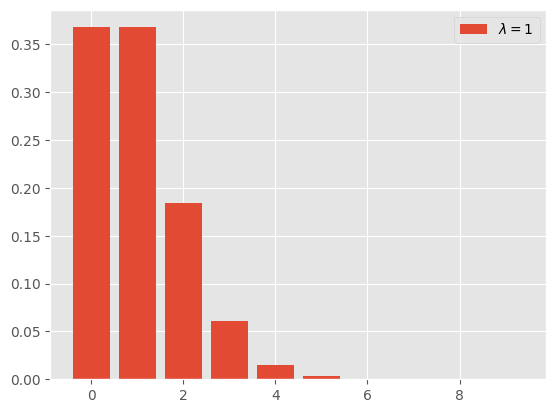

In [66]:
#lambda=1
from scipy.stats import poisson
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [72]:
print("lambda:1")
x @ f1

lambda:1


0.999998874797402

lambda:2


1.999525105343477

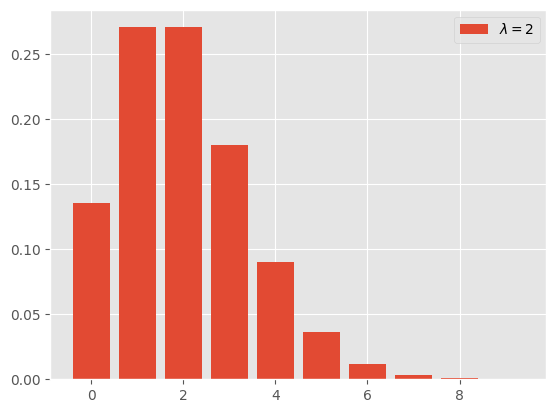

In [73]:
# lambda:2
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()
print("lambda:2")
x @ f2

lambda:3


2.9885910238149727

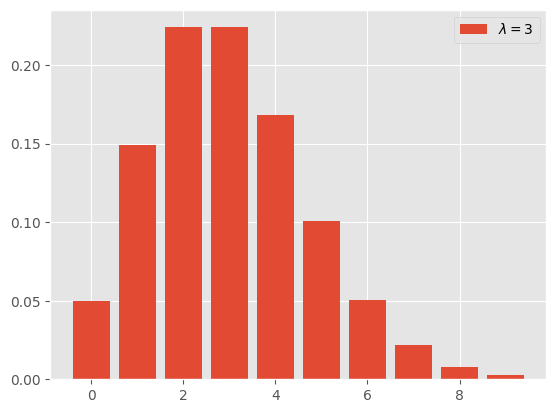

In [74]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()
print("lambda:3")
x @ f3

**Example**: Suppose emergency calls per hour follow a Poisson distribution and occur at a rate of 10 calls per hour. What is the probability of receiving 8 calls in any given hour?

In [75]:
poisson.pmf(8, 10)

0.11259903214902009

**Central Limit Theorem**

The Central Limit Theorem helps us reason about realisations of sample means.

Specifically, it tells us that in many repeated samples, the distribution of the sample means of a random variable is normal regardless of the underlying population distribution.

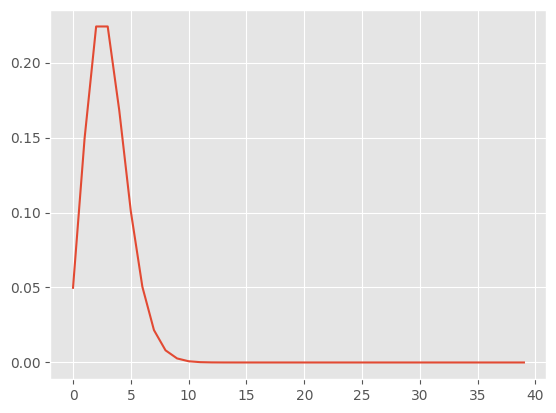

In [76]:
from scipy.stats import poisson
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([  2.,   7.,  21.,  63.,  88., 117.,  63.,  32.,   1.,   6.]),
 array([1.65, 1.91, 2.17, 2.43, 2.69, 2.95, 3.21, 3.47, 3.73, 3.99, 4.25]),
 <BarContainer object of 10 artists>)

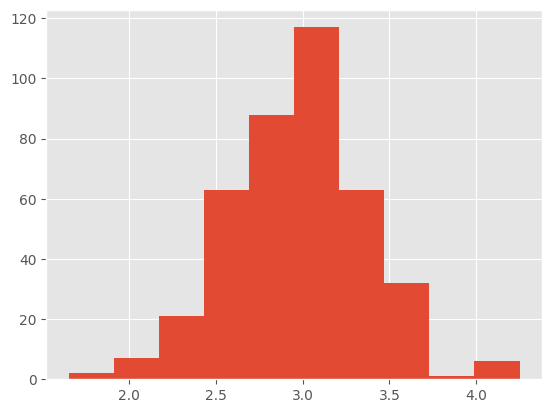

In [77]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)